Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each 
passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last 
year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting 
different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


In [1]:
import pandas as pd
df = pd.read_csv("D:\\Assignment datasets\\EastWestAirlines1.csv")
df.shape
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


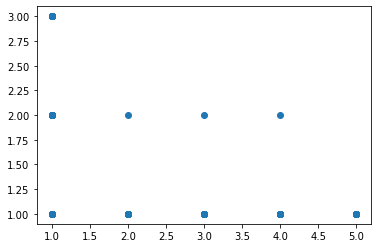

In [2]:
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,3],df.iloc[:,4])
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(df.iloc[:,2:])

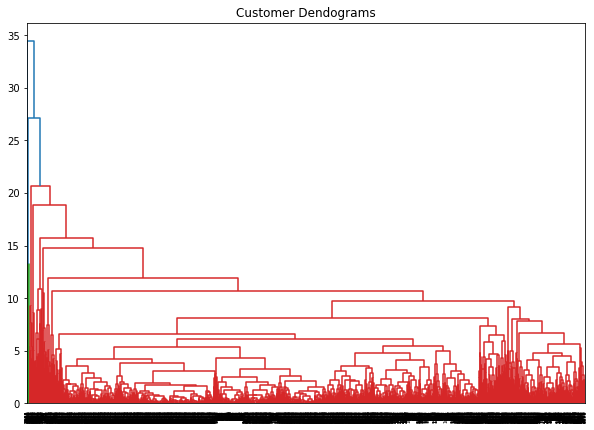

In [4]:
# Agglomerative clustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(SS_X, method='complete')) 

In [5]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
Y = cluster.fit_predict(SS_X)

In [6]:
Y = pd.DataFrame(Y)
Y[0].value_counts()


0    3940
3      25
2      15
4      15
1       4
Name: 0, dtype: int64

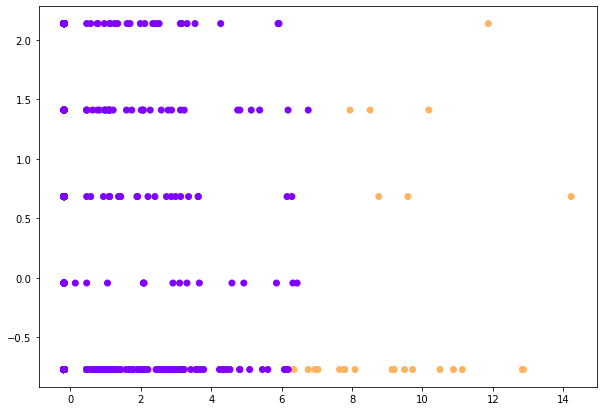

In [7]:
plt.figure(figsize=(10, 7))  
plt.scatter(SS_X[:,0], SS_X[:,1], c=cluster.labels_, cmap='rainbow')  

In [8]:
# K-Means clustering
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters=5,n_init=20)
Kmeans.fit(SS_X)
Y = Kmeans.predict(SS_X)

In [9]:
Y = pd.DataFrame(Y)
Y[0].value_counts()

2    2542
1    1236
0     163
3      43
4      15
Name: 0, dtype: int64

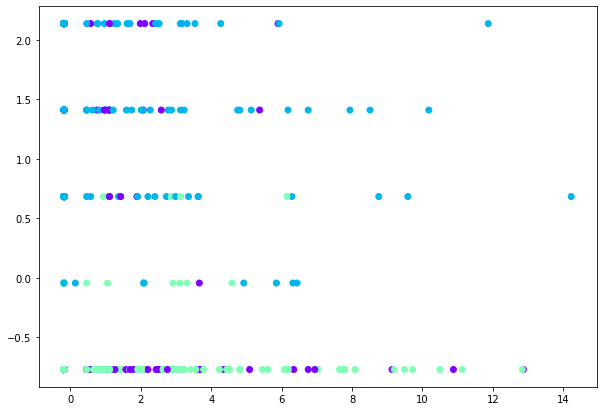

In [10]:
plt.figure(figsize=(10, 7))  
plt.scatter(SS_X[:,0], SS_X[:,1], c=Kmeans.labels_, cmap='rainbow')  

In [11]:
Kmeans.inertia_

20301.801431051037

In [14]:
# Getting the cluster centers
C = Kmeans.cluster_centers_

In [15]:
l1 = []
for i in range(1,11):
    Kmeans = KMeans(n_clusters=i,n_init=20)
    Kmeans.fit(SS_X)
    l1.append(Kmeans.inertia_)
    
print(l1)

[39990.00000000001, 31994.059340796615, 27514.81246097532, 23772.744872961885, 20301.877100134578, 17674.890083951897, 15550.247825458413, 13959.67422213686, 12704.338779075797, 11704.565156658393]


In [16]:
pd.DataFrame(range(1,11))        
pd.DataFrame(l1)

,0
0,39990.000000
1,31994.059341
2,27514.812461
3,23772.744873
4,20301.877100
5,17674.890084
6,15550.247825
7,13959.674222
8,12704.338779
9,11704.565157


In [17]:
pd.concat([pd.DataFrame(range(1,11)),pd.DataFrame(l1)], axis=1)

,0,0
0,1,39990.000000
1,2,31994.059341
2,3,27514.812461
3,4,23772.744873
4,5,20301.877100
5,6,17674.890084
6,7,15550.247825
7,8,13959.674222
8,9,12704.338779
9,10,11704.565157


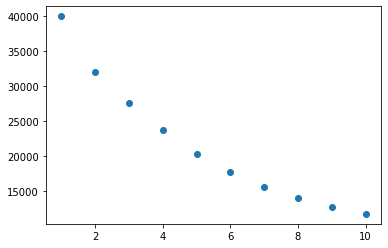

In [18]:
import matplotlib.pyplot as plt
plt.scatter(range(1,11),l1)
plt.show()

In [19]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(SS_X[:, 0], SS_X[:, 1], SS_X[:, 2])
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='Red', s=1000) 

C:\Users\Asus NB\AppData\Local\Temp\ipykernel_12816\615568748.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


In [20]:
# DBSCAN Clustering
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(SS_X)
dbscan.labels_
df['clusters']=dbscan.labels_
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [21]:
df.groupby('clusters').agg(['mean']).reset_index()

,clusters,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,1802.414062,150474.911458,1330.429688,2.710938,1.067708,1.127604,41853.476562,23.916667,2722.971354,7.838542,4540.786458,0.729167
1,0,2171.957948,57982.202691,6.044575,1.687132,1.000000,1.000000,9603.076955,8.731287,160.118167,0.487805,3823.188814,0.000000
2,1,1760.146199,80529.563074,18.043442,2.609858,1.000000,1.000000,24353.966583,13.335004,337.578112,1.074353,4589.631579,1.000000
3,2,705.250000,212427.750000,0.000000,3.000000,1.000000,1.000000,16794.750000,20.000000,1675.000000,6.000000,6263.500000,0.000000
4,3,2484.714286,34032.142857,0.000000,1.000000,2.000000,1.000000,8312.500000,12.285714,57.142857,0.357143,3315.928571,0.000000
5,4,2417.666667,51096.000000,0.000000,1.000000,3.000000,1.000000,15561.666667,14.333333,44.444444,0.222222,3603.444444,0.000000
6,5,1363.000000,60932.000000,1794.500000,3.750000,1.000000,1.000000,39889.750000,16.250000,250.000000,0.750000,5029.000000,1.000000
7,6,3167.444444,27113.888889,2475.444444,1.000000,1.000000,1.000000,2169.111111,4.555556,44.444444,0.333333,1900.111111,0.000000


In [22]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(df['clusters'],df['Balance'], c=dbscan.labels_)